## Import des librairies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Chargement des données

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
#df_train

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Exploration des données 

Comparaison des jeux de données 

In [5]:
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

In [6]:
#check for dupes for Id
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col
#df_train.drop(['Id'],axis =1,inplace=True)


0


### Les corrélations indiquent si deux variables sont linéairement équivalentes. (donc si elles sont importantes)

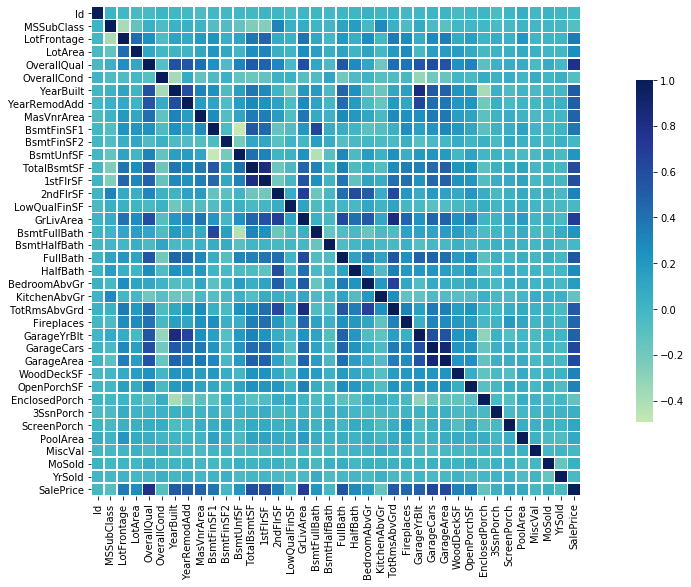

In [7]:
#correlation matrix
corr = df_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,cmap="YlGnBu", cbar_kws={"shrink": .70})

## Traitement des données

J'ai des colonnes qui contiennent des NAN, il va falloir que je les remplace

### Trouvez les fonctionnalités les plus importantes par rapport au "target"

In [15]:
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)


Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')


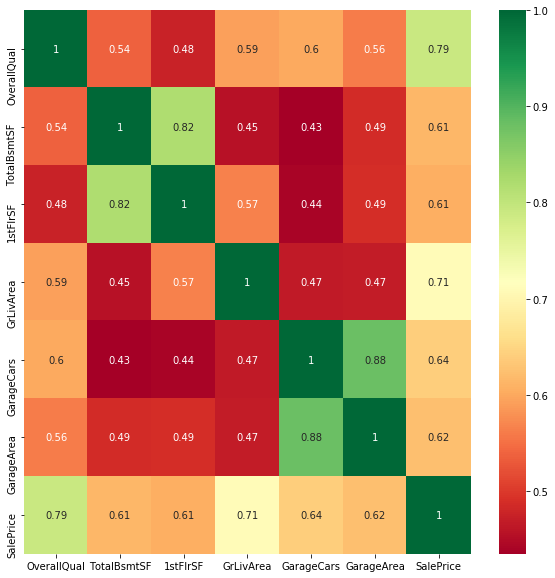

In [16]:
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.60]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print(top_corr_features)

### Pré-traitement

In [17]:
### drop features with >90% missing values

df_train.dropna(thresh=len(df_train)*0.9, axis=1)
df_test.dropna(thresh=len(df_test)*0.9, axis=1)

df_train.shape,df_test.shape

((1460, 81), (1459, 80))

### Différencier les caractéristiques numériques (moins la 'SalePrice') et les caractéristiques catégorielles ("objets")

In [18]:
df_train_nan = df_train.isnull().sum()
df_train_nan = df_train_nan[df_train_nan>0]
df_train_nan.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [19]:
df_test_nan = df_test.isnull().sum()
df_test_nan = df_test_nan[df_test_nan>0]
df_test_nan.sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [20]:
df_train_features = df_train
df_train_features.drop(columns="SalePrice")

df_train_cat = df_train_features.select_dtypes(include = ["object"]).columns
df_train_num = df_train_features.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(df_train_num)))
print("Categorical features : " + str(len(df_train_cat)))
train_num = df_train[df_train_num]
train_cat = df_train[df_train_cat]

Numerical features : 38
Categorical features : 43


In [21]:
df_test_features = df_test

df_test_cat = df_test_features.select_dtypes(include = ["object"]).columns
df_test_num = df_test_features.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(df_test_num)))
print("Categorical features : " + str(len(df_test_cat)))
test_num = df_test[df_test_num]
test_cat = df_test[df_test_cat]


Numerical features : 37
Categorical features : 43


In [22]:
train_num.select_dtypes(exclude='object').isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [23]:
test_num.select_dtypes(exclude='object').isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

### Gérer les valeurs manquantes restantes pour les entités numériques en utilisant la moyenne comme remplacement

In [24]:
train_num = train_num.fillna(train_num.mean())
test_num = test_num.fillna(train_num.mean()) #j'utilise la moyenne du train, on a plus de valeurs non null
#train_num.select_dtypes(exclude='object').isnull().sum()
test_num.select_dtypes(exclude='object').isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [25]:
train_cat.shape,train_num.shape

((1460, 43), (1460, 38))

In [26]:
listdrop_testcat = list(test_cat)
listdrop_traincat = list(train_cat)

In [27]:
train_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [28]:
test_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [29]:
train_cat = pd.get_dummies(train_cat, dummy_na=True)
test_cat = pd.get_dummies(test_cat, dummy_na=True)

#list(train_cat), list(test_cat)
listdrop = []
def spot(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    for a in set1 :
        if not(a in set2):
            print(a,"of list1 isn't in list2")
            x = train_cat[a]
            print(x[x>0])
            listdrop.append(a)
    for b in set2 :
        if not(b in set1):
            print(b,"of list2 isn't in list1")
            z = test_cat[b]
            print(z[z>0])
            listdrop.append(b)

            
spot(train_cat, test_cat)

train_cat.shape, test_cat.shape
listdrop

RoofMatl_Membran of list1 isn't in list2
271    1
Name: RoofMatl_Membran, dtype: uint8
GarageQual_Ex of list1 isn't in list2
185    1
268    1
760    1
Name: GarageQual_Ex, dtype: uint8
MiscFeature_TenC of list1 isn't in list2
1386    1
Name: MiscFeature_TenC, dtype: uint8
Condition2_RRAe of list1 isn't in list2
1230    1
Name: Condition2_RRAe, dtype: uint8
PoolQC_Fa of list1 isn't in list2
810     1
1386    1
Name: PoolQC_Fa, dtype: uint8
Heating_Floor of list1 isn't in list2
1321    1
Name: Heating_Floor, dtype: uint8
RoofMatl_ClyTile of list1 isn't in list2
1298    1
Name: RoofMatl_ClyTile, dtype: uint8
Utilities_NoSeWa of list1 isn't in list2
944    1
Name: Utilities_NoSeWa, dtype: uint8
Electrical_Mix of list1 isn't in list2
398    1
Name: Electrical_Mix, dtype: uint8
HouseStyle_2.5Fin of list1 isn't in list2
185     1
198     1
267     1
304     1
635     1
883     1
1031    1
1440    1
Name: HouseStyle_2.5Fin, dtype: uint8
Condition2_RRNn of list1 isn't in list2
29     1
548    

['RoofMatl_Membran',
 'GarageQual_Ex',
 'MiscFeature_TenC',
 'Condition2_RRAe',
 'PoolQC_Fa',
 'Heating_Floor',
 'RoofMatl_ClyTile',
 'Utilities_NoSeWa',
 'Electrical_Mix',
 'HouseStyle_2.5Fin',
 'Condition2_RRNn',
 'RoofMatl_Roll',
 'Exterior2nd_Other',
 'Exterior1st_ImStucc',
 'Condition2_RRAn',
 'Exterior1st_Stone',
 'Heating_OthW',
 'RoofMatl_Metal']

In [30]:
def drop_columns(df, columns_to_drop):
    for column in columns_to_drop:
        df.drop(columns=[column], axis=1, inplace=True)
    return df

train_cat = drop_columns(train_cat, listdrop)
train_cat.shape, test_cat.shape

((1460, 277), (1459, 277))

In [31]:
train_num.shape, test_num.shape

((1460, 38), (1459, 37))

### Concat de la partie catégorielle et numérique

In [32]:
df_train = pd.concat([train_cat,train_num],axis=1)
df_test = pd.concat([test_cat,test_num],axis=1)
df_train.shape, df_test.shape

((1460, 315), (1459, 314))

In [33]:
df_train

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,0,1,0,0,...,0,61,0,0,0,0,0,2,2008,208500
1,0,0,0,1,0,0,0,1,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,0,0,0,1,0,0,0,1,0,0,...,0,42,0,0,0,0,0,9,2008,223500
3,0,0,0,1,0,0,0,1,0,0,...,0,35,272,0,0,0,0,2,2006,140000
4,0,0,0,1,0,0,0,1,0,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,1,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,0,0,0,1,0,0,0,1,0,0,...,349,0,0,0,0,0,0,2,2010,210000
1457,0,0,0,1,0,0,0,1,0,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,0,0,0,1,0,0,0,1,0,0,...,366,0,112,0,0,0,0,4,2010,142125


In [34]:
df_test

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,1,0,0,0,0,1,0,0,...,730.0,140,0,0,0,120,0,0,6,2010
1,0,0,0,1,0,0,0,1,0,0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,0,0,0,1,0,0,0,1,0,0,...,482.0,212,34,0,0,0,0,0,3,2010
3,0,0,0,1,0,0,0,1,0,0,...,470.0,360,36,0,0,0,0,0,6,2010
4,0,0,0,1,0,0,0,1,0,0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,0,1,0,0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,0,0,0,0,1,0,0,1,0,0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,0,0,0,1,0,0,0,1,0,0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,0,0,0,1,0,0,0,1,0,0,...,0.0,80,32,0,0,0,0,700,7,2006


In [35]:
str(df_train.isnull().values.sum()), str(df_test.isnull().values.sum())

('0', '0')

In [36]:
print("Il n'y a plus de valeur NAN")

Il n'y a plus de valeur NAN


In [37]:
X_train, Y_train = df_train.drop(columns="SalePrice"), df_train["SalePrice"]
X_test = df_test

X_train.shape, Y_train.shape, X_test.shape

((1460, 314), (1460,), (1459, 314))

In [38]:
X_train

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,1,0,0,0,1,0,0,...,548,0,61,0,0,0,0,0,2,2008
1,0,0,0,1,0,0,0,1,0,0,...,460,298,0,0,0,0,0,0,5,2007
2,0,0,0,1,0,0,0,1,0,0,...,608,0,42,0,0,0,0,0,9,2008
3,0,0,0,1,0,0,0,1,0,0,...,642,0,35,272,0,0,0,0,2,2006
4,0,0,0,1,0,0,0,1,0,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,1,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,0,0,0,1,0,0,0,1,0,0,...,500,349,0,0,0,0,0,0,2,2010
1457,0,0,0,1,0,0,0,1,0,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,0,0,0,1,0,0,0,1,0,0,...,240,366,0,112,0,0,0,0,4,2010


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [56]:
regr = RandomForestRegressor(random_state=0, n_estimators=100, max_features=9)
regr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=9, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [57]:
y_pred = regr.predict(X_test)

In [58]:
y_pred

array([126365.77, 156275.5 , 181712.72, ..., 157374.84, 121258.94,
       215408.33])

In [40]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)
Y_val_predicted = LR_model.predict(X_test) # utilisation du modèle sur le jeu de test

In [59]:
df_final = pd.DataFrame()

In [60]:
df_final["Id"] = X_test["Id"]
df_final["SalePrice"] = y_pred

In [61]:
df_final.to_csv("result_V5.csv", index=False, sep=",")

In [62]:
import pandas as pd  
result = pd.read_csv("result_V5.csv", sep=",")
str(result)

'        Id  SalePrice\n0     1461  126365.77\n1     1462  156275.50\n2     1463  181712.72\n3     1464  193177.82\n4     1465  195586.15\n...    ...        ...\n1454  2915   94929.00\n1455  2916   93884.57\n1456  2917  157374.84\n1457  2918  121258.94\n1458  2919  215408.33\n\n[1459 rows x 2 columns]'